In [1]:
import pandas as pd 
import numpy as np
from helpers import *
import coach_dicts
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss, roc_curve, auc


# Display plots inside the notebook
%matplotlib inline

# Ignore warning related to pandas_profiling
import warnings
warnings.filterwarnings('ignore') 

from pathlib import Path

# Display all dataframe columns in outputs (it has 63 columns, which is wider than the notebook)
# This sets it up to display with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 800) 
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1800)

In [2]:
path = os.environ.get("DATA_PATH")

In [3]:
#data = "intervention_only_leona_2.csv"

In [4]:
data = "001_evaluation_20201013_clean_unordered.csv"

In [5]:
df = pd.read_csv(path + data, sep=",", low_memory = False)

In [6]:
df.replace (' ', np.nan, inplace=True)

In [7]:
df.shape

(13300, 1304)

In [8]:
df.head()

,accessCodeId,mtkId,codeEntered,registration,studyInfo,studyVariant,coach,problem,coach.note,dropout,M1_measurementPos,M2_measurementPos,M3_measurementPos,M4_measurementPos,M5_measurementPos,M6_measurementPos,M7_measurementPos,TI_score,TI_bip1,TI_bip2,TI_hyp.x,TI_MDE,TI_dyst,TI_MDE.x,TI_20.xx,TI_F20.8,TI_F25,TI_F22,TI_F23,TI_F29,TI_MDE_vr,TI_MDE_tr,TI_HYP_vr,TI_MAN_vr,TI_medik,TI_komm,TI_inkl,TI_rekrut,in_ther1,in_ther2,in_med1,in_med2,1_module,2_module,3_module,4_module,5_module,6_module,7_module,POST_WL_screening_start,POST_screening_start,FU1_screening_start,FU2_screening_start,FU3_screening_start,1_login,2_login,3_login,4_login,5_login,6_login,7_login,1_login.duration,2_login.duration,3_login.duration,4_login.duration,5_login.duration,6_login.duration,7_login.duration,1_feedback,2_feedback,3_feedback,4_feedback,5_feedback,6_feedback,7_feedback,1_fb.duration,2_fb.duration,3_fb.duration,4_fb.duration,5_fb.duration,6_fb.duration,7_fb.duration,1_fb.size,2_fb.size,3_fb.size,4_fb.size,5_fb.size,6_fb.size,7_fb.size,1_reminder,2_reminder,3_reminder,4_reminder,5_reminder,6_reminder,7_reminder,1_contact.unplanned,2_contact.unplanned,3_contact.unplanned,4_contact.unplanned,5_contact.unplanned,6_contact.unplanned,7_contact.unplanned,1_letter,2_letter,7_letter,1_letter.size,2_letter.size,7_letter.size,M3_planner.quantity,M4_planner.quantity,M5_planner.quantity,M6_planner.quantity,M7_planner.quantity,M3_diary.quantity,M4_diary.quantity,M5_diary.quantity,M6_diary.quantity,M7_diary.quantity,M3_positive.quantity,M4_positive.quantity,M5_positive.quantity,M6_positive.quantity,M7_positive.quantity,M5_1_nbt.duration,M5_2_nbt.duration,M5_3_nbt.duration,M6_1_nbt.duration,M6_2_nbt.duration,M6_3_nbt.duration,M5_1_nbt.duration.nobreaks,M5_2_nbt.duration.nobreaks,M5_3_nbt.duration.nobreaks,M6_1_nbt.duration.nobreaks,M6_2_nbt.duration.nobreaks,M6_3_nbt.duration.nobreaks,M5_1_nbt.breaks.count,M5_2_nbt.breaks.count,M5_3_nbt.breaks.count,M6_1_nbt.breaks.count,M6_2_nbt.breaks.count,M6_3_nbt.breaks.count,M5_1_1_nbt.answer,M5_1_2_nbt.answer,M5_1_3_nbt.answer,M5_1_4_nbt.answer,M5_1_5_nbt.answer,M5_1_6_nbt.answer,M5_1_7_nbt.answer,M5_1_8_nbt.answer,M5_1_9_nbt.answer,M5_1_10_nbt.answer,M5_2_1_nbt.answer,M5_2_2_nbt.answer,M5_2_3_nbt.answer,M5_2_4_nbt.answer,M5_2_5_nbt.answer,M5_2_6_nbt.answer,M5_2_7_nbt.answer,M5_2_8_nbt.answer,M5_2_9_nbt.answer,M5_2_10_nbt.answer,M5_3_1_nbt.answer,M5_3_2_nbt.answer,M5_3_3_nbt.answer,M5_3_4_nbt.answer,M5_3_5_nbt.answer,M5_3_6_nbt.answer,M5_3_7_nbt.answer,M5_3_8_nbt.answer,M5_3_9_nbt.answer,M5_3_10_nbt.answer,M6_1_1_nbt.answer,M6_1_2_nbt.answer,M6_1_3_nbt.answer,M6_1_4_nbt.answer,M6_1_5_nbt.answer,M6_2_1_nbt.answer,M6_2_2_nbt.answer,M6_2_3_nbt.answer,M6_2_4_nbt.answer,M6_2_5_nbt.answer,M6_3_1_nbt.answer,M6_3_2_nbt.answer,M6_3_3_nbt.answer,M6_3_4_nbt.answer,M6_3_5_nbt.answer,M6_protocol.quantity,M7_protocol.quantity,PRE_birth,PRE_sex,PRE_education,PRE_work,PRE_household,PRE_relation,PRE_residence,PRE_internet,PRE_height,PRE_weight,PRE_treatment,PRE_ambul1,PRE_ambul2,PRE_ambul3,PRE_ambul4,PRE_ambul5,PRE_ambul6,PRE_tagesk1,PRE_tagesk2,PRE_tagesk3,PRE_tagesk4,PRE_tagesk5,PRE_tagesk6,PRE_psychiat1,PRE_psychiat2,PRE_psychiat3,PRE_psychiat4,PRE_psychiat5,PRE_psychiat6,PRE_abspr1,PRE_abspr2,PRE_abspr3,PRE_PT_planned,PRE_support,PRE_supportType,PRE_kPT,PRE_kPT_comment,PRE_material,PRE_material_comments,PRE_ill,PRE_ill_comments,PRE_sickleave,PRE_sickleave_comments,PRE_doc,PRE_doc_comments,PRE_neurol,PRE_neurol_comments,PRE_selfhelp,PRE_selfhelp_comments,PRE_counsel,PRE_counsel_comments,PRE_therapy,PRE_therapy_comments,PRE_med,PRE_med_comments,PRE_hospital,PRE_hospital_comments,PRE_hos.other,PRE_hos.other_comments,PRE_bdi1,PRE_bdi2,PRE_bdi3,PRE_bdi4,PRE_bdi5,PRE_bdi6,PRE_bdi7,PRE_bdi8,PRE_bdi9,PRE_bdi10,PRE_bdi11,PRE_bdi12,PRE_bdi13,PRE_bdi14,PRE_bdi15,PRE_bdi16,PRE_bdi17,PRE_bdi18,PRE_bdi19,PRE_bdi20,PRE_bdi21,PRE_phqS1,PRE_phqS2,PRE_phqS3,PRE_phqS4,PRE_phqS5,PRE_phqS6,PRE_phqS7,PRE_phqS8,PRE_phqS9,PRE_phqS10,PRE_phqD1,PRE_phqD2,PRE_phqD

### Create shortened df 

The following predictors were chosen for the current analysis:

- df2 = BDI/PHQ (Post), PHQ M1, Pre: SKID-Diagnosen, IMET, EUROHIS_QUOL, BDI, PHQ-D, PHQ-S, GAD, Soziodemographisch, Costa, GPSE, BSSS, PATHEV + EUHEALS, IPQ-R, PVQ, SEWiP, Nutzung d. Gesundheitswesens 
- additional = 2_letter, 2_letter_size, 2_fb_size, 2_reminder, 2_module, 1_letter, 1_letter_size

In [9]:
column_zwei = ['registration','studyVariant','coach','PRE_bdi1','PRE_bdi2',
               'PRE_bdi3','PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10',
               'PRE_bdi11','PRE_bdi12','PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18',
               'PRE_bdi19','PRE_bdi20','PRE_bdi21','POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9',
               'PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9','PRE_phqS10','PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5',
               'PRE_phqD6','PRE_phqD7','PRE_phqD8','PRE_phqD9', 'PRE_birth','PRE_sex','PRE_education',
               'PRE_work','PRE_household','PRE_relation','PRE_residence','PRE_internet','PRE_height','PRE_weight',
               'PRE_treatment','PRE_support','PRE_kPT','PRE_ill','PRE_sickleave','PRE_doc',
               'PRE_neurol','PRE_selfhelp','PRE_counsel','PRE_therapy','PRE_med','PRE_hospital',
            'PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5',
               'PRE_eurohis6','PRE_eurohis7','PRE_eurohis8', 'TI_score',
               'TI_MDE','TI_dyst','TI_MDE_vr','TI_MDE_tr','TI_medik','PRE_gad1',
               'PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7', 'PRE_costa1', 'PRE_costa2',  'PRE_costa5', 'PRE_costa6', 'PRE_costa8', 'PRE_costa10', 'PRE_costa11',
              'PRE_costa12', 'PRE_costa13', 'PRE_costa14', 'PRE_costa15', 'PRE_costa18',
              'PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4',
              'PRE_pathev5', 'PRE_pathev6', 'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10', 
              'PRE_euheals1','PRE_euheals2','PRE_euheals3','PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18', 'PRE_bsss1','PRE_bsss2','PRE_bsss3',
               'PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8','PRE_bsss9','PRE_bsss10','PRE_bsss11',
               'PRE_bsss12','PRE_bsss13','PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10','PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5',
               'PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9','PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14',
               'PRE_pvq15','PRE_pvq16','PRE_pvq17','PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21', 'PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10', 'M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6',
               'M1_phqD7','M1_phqD8','M1_phqD9', 'M3_phqD1', 'M3_phqD2', 'M3_phqD3', 'M3_phqD4', 'M3_phqD5', 'M3_phqD6',
               'M3_phqD7', 'M3_phqD8', 'M3_phqD9',
              'M3_sewip1','M3_sewip2','M3_sewip3','M3_sewip4','M3_sewip5','M3_sewip6','M3_sewip7','M3_sewip8',
                    'M3_sewip9','M3_sewip10','M3_sewip11','M3_sewip12','M3_sewip13','M3_sewip14','M3_sewip15','M3_sewip16','M3_sewip17',
                    'M3_sewip18','M3_sewip19','M3_sewip20','M3_sewip21',
                'M3_costa1','M3_costa2','M3_costa5','M3_costa6','M3_costa8',
                    'M3_costa10','M3_costa11','M3_costa12','M3_costa13','M3_costa14','M3_costa15',
                    'M3_costa18']

To Do:
* df["dropout"] umändern in binäre Variablen
* Study Variant in binäre Variable
* Birth Year in Age umwandeln
* Hight und Weight in BDI umwandeln
* Anzahl Diagnosen zählen
* Therapist Variablen anonymisieren und Alter, Geschlecht, Abschluss extrahieren
* Skalen auswerten: IPQr8 umpolen, IMET10 umpolen
* Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence
* Standardize TI_Score, BMI, Age, Internet (optional; not necessary for RF; erst nach Train-Test_Split)
* Transform Post_BDI to RCI 
* Idea: Handle registration date as cyclical feature
* Idea: Fancier strategies for missing values

Notizen:
* PRE_pt_planned raus, da PatientInnen ausgeschlossen werden, die eine PT geplant haben

In [10]:
df2 = df[column_zwei]

In [11]:
df2 = df2[df2["studyVariant"].notnull()]

In [12]:
df2.shape

(2304, 243)

# 1. Prepare first dataframe for first analysis 

## 1.1 Check out Missing Values 

### 1.1.1 Drop rows with missing values on outcome

In [13]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 243 columns.
There are 164 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
POST_phqD1,661,28.7,"[1.0, nan, 2.0, 0.0, 3.0]"
POST_phqD3,661,28.7,"[1.0, 2.0, nan, 3.0, 0.0]"
POST_phqD4,661,28.7,"[1.0, 2.0, nan, 0.0, 3.0]"
POST_phqD5,661,28.7,"[2.0, 1.0, nan, 0.0, 3.0]"
POST_phqD6,661,28.7,"[0.0, nan, 2.0, 1.0, 3.0]"
POST_phqD7,661,28.7,"[1.0, nan, 0.0, 2.0, 3.0]"
POST_phqD8,661,28.7,"[0.0, 1.0, nan, 2.0, 3.0]"
POST_phqD9,661,28.7,"[0.0, nan, 1.0, 2.0]"
POST_phqD2,661,28.7,"[1.0, nan, 2.0, 0.0, 3.0]"
M3_sewip20,327,14.2,"[4.0, 3.0, nan, 5.0, 1.0, 2.0]"


In [14]:
post_phq_columns = ['POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [15]:
df2 = df2[df2[post_phq_columns].notnull().all(axis=1)]

In [16]:
df2.shape

(1643, 243)

In [17]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 243 columns.
There are 152 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
M3_sewip20,97,5.9,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip17,96,5.8,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip19,95,5.8,"[3.0, 4.0, 5.0, 1.0, 2.0, nan]"
M3_sewip12,87,5.3,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip13,85,5.2,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip14,82,5.0,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip21,81,4.9,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip6,79,4.8,"[5.0, 3.0, 2.0, 1.0, 4.0, nan]"
M3_sewip18,78,4.7,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip10,75,4.6,"[4.0, 2.0, 5.0, 3.0, 1.0, nan]"


In [18]:
m3_phq_cols = ['M3_phqD1','M3_phqD2','M3_phqD3','M3_phqD4','M3_phqD5',
               'M3_phqD6','M3_phqD7','M3_phqD8','M3_phqD9']

In [19]:
m3_sewip_cols = ['M3_sewip1','M3_sewip2','M3_sewip3','M3_sewip4','M3_sewip5','M3_sewip6','M3_sewip7','M3_sewip8',
                    'M3_sewip9','M3_sewip10','M3_sewip11','M3_sewip12','M3_sewip13','M3_sewip14','M3_sewip15','M3_sewip16','M3_sewip17',
                    'M3_sewip18','M3_sewip19','M3_sewip20','M3_sewip21']

In [20]:
df2 = df2[df2[m3_phq_cols].notnull().all(axis=1)]

In [21]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 243 columns.
There are 134 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
M3_sewip20,45,2.8,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip17,44,2.8,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip19,43,2.7,"[3.0, 4.0, 5.0, 1.0, 2.0, nan]"
M3_sewip12,35,2.2,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip13,33,2.1,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip14,30,1.9,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip21,29,1.8,"[4.0, 2.0, 3.0, 5.0, 1.0, nan]"
M3_sewip6,27,1.7,"[5.0, 3.0, 2.0, 1.0, 4.0, nan]"
M3_sewip18,26,1.6,"[4.0, 3.0, 5.0, 1.0, 2.0, nan]"
M3_sewip10,23,1.4,"[4.0, 2.0, 5.0, 3.0, 1.0, nan]"


In [22]:
df2.shape

(1591, 243)

### 1.1.2 Drop columns referring to exclusion criteria

Diagnosen:
* F20.8: Schizophrenie = Exclusion criterion --> Drop 
* F29: Nicht näher bezeichnete nichtorganische Psychose = Exclusion criterion --> Drop
* F23: Akute vorübergehende psychotische Störungen = Exclusion criterion --> Drop
* F22: Wahnhafte Störung = Exclusion criterion --> Drop
* F25: Schizoaffektive Störung = Exclusion criterion --> Drop
* F20: Paranoide Schizophrenie = Exclusion criterion --> Drop
* TI_hyp_x: Hypomania --> Drop

### 1.1.3 Replace missing categorical values with mode

Some data types are object --> we will turn them numeric to allow replacement with mode value

In [23]:
miss_df2 = missing_values_table(df2)
missing_cols = miss_df2.index.tolist()

The dataset has 243 columns.
There are 134 columns that have missing values.


In [24]:
for column in missing_cols:
    df2[column] = pd.to_numeric(df2[column], errors='coerce').astype('Int64')

In [25]:
def fillna_with_mean(df, column):
    mean = df[column].mean()
    mean = int(mean)

    df[column] = df[column].fillna(mean)

In [26]:
for column in missing_cols:
    fillna_with_mean(df2, column)

In [27]:
filename = path + "prepared_data.csv"
df2.to_csv(filename, sep=";", encoding="utf-8", index=False)

Categorical features: "PRE_work", "PRE_household", "PRE_residence", "PRE_relation", 'PRE_sickleave',"registration", "coach"

In [28]:
df2.groupby("coach")["studyVariant"].count()

coach
badra          26 
carmen         174
ckamp          20 
damerow        2  
eiling         102
friedmann      17 
helenn         119
jaekel         16 
kerber         168
laufer         203
manojlovic     32 
meyer          101
mumm           1  
mweiler        148
pfeiffer       39 
reich          27 
remmers        133
schendel       10 
schoenebeck    106
schumacher     114
swolf          33 
Name: studyVariant, dtype: int64

In [29]:
df2.groupby("PRE_work")["studyVariant"].count()

PRE_work
1.0    96  
2.0    1045
3.0    145 
4.0    15  
5.0    98  
6.0    119 
7.0    73  
Name: studyVariant, dtype: int64

In [30]:
df2.groupby("PRE_household")["studyVariant"].count()

PRE_household
0.0    412
1.0    536
2.0    424
3.0    65 
4.0    154
Name: studyVariant, dtype: int64

In [31]:
df2.groupby("PRE_residence")["studyVariant"].count()

PRE_residence
1.0    529
2.0    292
3.0    287
4.0    468
5.0    15 
Name: studyVariant, dtype: int64

In [32]:
df2.groupby("PRE_relation")["studyVariant"].count()

PRE_relation
0.0    666
1.0    754
2.0    149
3.0    22 
Name: studyVariant, dtype: int64

In [33]:
df2.groupby("PRE_sickleave")["studyVariant"].count()

PRE_sickleave
0.0    968
1.0    384
2.0    239
Name: studyVariant, dtype: int64

In [34]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.80,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


In [35]:
#Call the function with a default threshold of 75%
transformed_column,new_category_list=cumulatively_categorise(df2['coach'],return_categories_list=True)


In [36]:
df2["coach"] = transformed_column

In [37]:
df2.groupby("coach")["studyVariant"].count()

coach
Other          223
carmen         174
eiling         102
helenn         119
kerber         168
laufer         203
meyer          101
mweiler        148
remmers        133
schoenebeck    106
schumacher     114
Name: studyVariant, dtype: int64

## 1.2 Aggregate and Transform columns

### 1.2.1 Turn study variant into a binary variable

In [38]:
df2['studyVariant'] = pd.get_dummies(df2['studyVariant'])

### 1.2.2 Create extra columns with number of diagnoses

In [39]:
diagnose_columns = ['TI_MDE','TI_dyst','TI_MDE_vr','TI_MDE_tr']

In [40]:
df2["n_diagn"] = df2[diagnose_columns].sum(axis=1)

In [41]:
df2.groupby("n_diagn")["studyVariant"].count()

n_diagn
0.0    497
1.0    878
2.0    214
3.0    2  
Name: studyVariant, dtype: int64

### 1.2.3 Anonymize coach variable and extract gender 

In [42]:
coach_dict = coach_dicts.coach_dict

In [43]:
anonym_dict = coach_dicts.anonym_dict


In [44]:
df2["coach_gender"] = df2["coach"]
df2.replace({"coach_gender": coach_dict}, inplace=True)

In [45]:
df2.replace({"coach": anonym_dict}, inplace=True)

In [46]:
df2["coach"] = df2["coach"].astype("|S")

### 1.2.4 Check dtypes and answer formats

In [47]:
answer_table = show_answers(df2)
answer_table

,Amount of Answers,Anwers
Item,,
registration,781,Free Input
PRE_weight,93,Free Input
PRE_birth,67,Free Input
PRE_internet,62,Free Input
PRE_height,54,Free Input
TI_score,27,Free Input
PRE_imet7,11,Free Input
PRE_imet10,11,Free Input
PRE_imet8,11,Free Input


--> Data types of some scales have to be changed from object to numeric to create sum scores

### 1.2.5 Create Sum Scores of clinical screenings

#### BDI-II

In [48]:
pre_bdi_columns = ['PRE_bdi1','PRE_bdi2','PRE_bdi3',
               'PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10','PRE_bdi11','PRE_bdi12',
               'PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18','PRE_bdi19','PRE_bdi20',
               'PRE_bdi21']

In [49]:
df2["PRE_bdi_sum"] = df2[pre_bdi_columns].sum(axis=1).astype('Int64')

In [50]:
df2["PRE_bdi_sum"].describe()

count    1591.000000
mean     21.447517  
std      4.084898   
min      14.000000  
25%      18.000000  
50%      22.000000  
75%      25.000000  
max      28.000000  
Name: PRE_bdi_sum, dtype: float64

In [51]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 246 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Missing Values


#### PHQ-D

In [52]:
pre_phq_columns = ['PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5','PRE_phqD6','PRE_phqD7',
               'PRE_phqD8','PRE_phqD9']

In [53]:
df2[pre_phq_columns] = df2[pre_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [54]:
df2["phq_d_sum"] = df2[pre_phq_columns].sum(axis=1)

In [55]:
df2["phq_d_sum"].describe()

count    1591.000000
mean     11.636706  
std      3.343633   
min      4.000000   
25%      9.000000   
50%      11.000000  
75%      14.000000  
max      24.000000  
Name: phq_d_sum, dtype: float64

#### PHQ-D M1

In [56]:
m1_phq_columns = ['M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6','M1_phqD7',
               'M1_phqD8','M1_phqD9']

In [57]:
df2[m1_phq_columns] = df2[m1_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [58]:
df2["phq_m1_sum"] = df2[m1_phq_columns].sum(axis=1)

In [59]:
df2["phq_early_change"] = df2["phq_d_sum"] - df2["phq_m1_sum"]

In [60]:
df2.drop(m1_phq_columns, axis=1, inplace=True)

In [61]:
df2.drop("phq_m1_sum", axis=1, inplace=True)

 **PHQ-D Outcome**

In [62]:
post_phq_columns = ['POST_phqD1', 'POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [63]:
df2[post_phq_columns] = df2[post_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [64]:
df2["phq_post"] = df2[post_phq_columns].sum(axis=1)

In [65]:
df2["phq_post"].describe()

count    1591.000000
mean     6.901320   
std      4.222246   
min      0.000000   
25%      4.000000   
50%      6.000000   
75%      9.000000   
max      24.000000  
Name: phq_post, dtype: float64

In [66]:
df2.drop(post_phq_columns, axis=1, inplace=True)

#### PHQ-S

In [67]:
phq_s_columns = ['PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9', 'PRE_phqS10']

In [68]:
df2[phq_s_columns] = df2[phq_s_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [69]:
df2["phq_s_sum"] = df2[phq_s_columns].sum(axis=1)

In [70]:
df2["phq_s_sum"].describe()

count    1591.000000
mean     8.933375   
std      3.311020   
min      0.000000   
25%      7.000000   
50%      9.000000   
75%      11.000000  
max      20.000000  
Name: phq_s_sum, dtype: float64

#### EUROHIS-QOL

In [71]:
eurohis_columns = ['PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5','PRE_eurohis6',
                   'PRE_eurohis7','PRE_eurohis8']

In [72]:
df2[eurohis_columns] = df2[eurohis_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [73]:
df2["eurohis_sum"] = df2[eurohis_columns].sum(axis=1)

#### IMET

In [74]:
imet_columns = ['PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10']

In [75]:
df2[imet_columns] = df2[imet_columns].apply(pd.to_numeric, errors='coerce')

In [76]:
df2['PRE_imet10']

4        3 
8        5 
22       10
27       3 
30       7 
31       5 
42       9 
53       5 
59       10
63       4 
65       9 
66       5 
67       5 
71       4 
73       9 
75       5 
77       8 
80       3 
82       5 
86       8 
88       6 
94       7 
96       10
100      10
103      7 
104      10
106      3 
107      10
118      4 
119      5 
122      2 
124      2 
128      4 
131      8 
133      3 
134      5 
146      9 
148      8 
150      4 
153      6 
155      9 
159      6 
160      7 
164      7 
167      4 
172      6 
173      4 
175      0 
177      6 
179      10
180      2 
183      5 
187      8 
188      5 
190      9 
191      5 
194      2 
195      9 
202      9 
203      6 
205      7 
206      10
213      7 
215      4 
216      4 
227      5 
229      9 
235      5 
238      8 
245      8 
246      8 
258      7 
262      8 
267      5 
268      0 
271      6 
275      2 
278      8 
281      6 
287      6 
297      7 
303      8 
305      7 
308 

In [77]:
df2['PRE_imet10'] = df2['PRE_imet10'].map({0:10, 1:9, 2:8, 3:7, 4:6, 5:5, 6:4, 7:3, 8:2, 9:1, 10:0})

In [78]:
df2["imet_sum"] = df2[imet_columns].sum(axis=1)

In [79]:
df2["imet_sum"].describe()

count    1591.000000
mean     39.656820  
std      13.687175  
min      3.000000   
25%      30.000000  
50%      39.000000  
75%      49.000000  
max      88.000000  
Name: imet_sum, dtype: float64

#### GAD7

In [80]:
gad_columns= ['PRE_gad1','PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7']

In [81]:
df2[gad_columns] = df2[gad_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [82]:
df2["gad_sum"] = df2[gad_columns].sum(axis=1)

In [83]:
df2.gad_sum.describe()

count    1591.000000
mean     9.881835   
std      3.727999   
min      0.000000   
25%      7.000000   
50%      9.000000   
75%      12.000000  
max      21.000000  
Name: gad_sum, dtype: float64

**Costa**

Summenscore, keine invertierten Items. Nach Subskalen erkundigen

**Pathev**

Therapieerwartung und Therapieevaluation. 1,3,5,7,9,10 sind negativ (invertiert). 

In [84]:
pathev_columns = ['PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4','PRE_pathev5', 'PRE_pathev6', 
                  'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10']

In [85]:
df2[pathev_columns] = df2[pathev_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [86]:
invert_columns = ['PRE_pathev1', 'PRE_pathev3','PRE_pathev5','PRE_pathev7','PRE_pathev9', 'PRE_pathev10']

In [87]:
for column in invert_columns:
    df2[column] = df2[column].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [88]:
df2["pathev_sum"] = df2[pathev_columns].sum(axis=1).astype('Int64')

In [89]:
df2["pathev_sum"].describe()

count    1591.00000
mean     36.60528  
std      5.31854   
min      18.00000  
25%      33.00000  
50%      37.00000  
75%      40.00000  
max      50.00000  
Name: pathev_sum, dtype: float64

**Euheals**

Summenscore. Keine invertierten Items

In [90]:
euheals_columns = ['PRE_euheals1','PRE_euheals2','PRE_euheals3']

In [91]:
df2[euheals_columns] = df2[euheals_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [92]:
df2["euheals_sum"] = df2[euheals_columns].sum(axis=1).astype('Int64')

In [93]:
df2["euheals_sum"].describe()

count    1591.000000
mean     20.669390  
std      4.683847   
min      3.000000   
25%      17.000000  
50%      19.000000  
75%      27.000000  
max      27.000000  
Name: euheals_sum, dtype: float64

**IPQ-R**

Krankheitswahrnehmung. Item 8 ist invertiert. Auswertung = Summenscore


In [94]:
ipqr_columns = ['PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18']

In [95]:
df2[ipqr_columns] = df2[ipqr_columns].apply(pd.to_numeric, errors='coerce')

In [96]:
df2['PRE_ipqr8'] = df2['PRE_ipqr8'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [97]:
df2["ipqr_sum"] = df2[ipqr_columns].sum(axis=1).astype('Int64')

In [98]:
df2["ipqr_sum"].describe()

count    1591.000000
mean     55.829038  
std      7.267983   
min      30.000000  
25%      51.000000  
50%      56.000000  
75%      61.000000  
max      83.000000  
Name: ipqr_sum, dtype: float64

**GPSE**

Selbstwirksamkeitserwartung. Nur eine Skala --> Summenwert

In [99]:
gpse_columns = ['PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10']

In [100]:
df2[gpse_columns] = df2[gpse_columns].apply(pd.to_numeric, errors='coerce')

In [101]:
df2["gpse_sum"] = df2[gpse_columns].sum(axis=1).astype('Int64')

In [102]:
df2["gpse_sum"].describe()

count    1591.000000
mean     24.594595  
std      4.673592   
min      10.000000  
25%      21.000000  
50%      25.000000  
75%      28.000000  
max      40.000000  
Name: gpse_sum, dtype: float64

**BSSS**

Berliner Social Support Skalen. 2 Subskalen: Perceived Support (Item 1-8), Support Seeking (Item 9-13)

In [103]:
bsss_columns = ['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8',
                'PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']

In [104]:
df2[bsss_columns] = df2[bsss_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [105]:
df2["bsss_perceived"] = df2[['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7',
                           'PRE_bsss8']].sum(axis=1).astype('Int64')

In [106]:
df2["bsss_suppseek"] = df2[['PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']].sum(axis=1).astype('Int64')

**PVQ**

Subskalen: Selbstbestimmung (Item 1,11), Macht (Item 2,17), Universalismus (Item 3,8,19), Leistung (Item 4,13), Sicherheit (Item 5,14), Stimulation (Item 6,15), Konformität (Item 7,16), Tradition (Item 9, 20), Hedonismus (Item 10,21), Benevolenz (Item 12,18) --> Summenscores machen wenig Sinn

In [107]:
pvq_columns = ['PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5','PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9',
               'PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14','PRE_pvq15','PRE_pvq16','PRE_pvq17',
               'PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21']

In [108]:
df2[pvq_columns] = df2[pvq_columns].apply(pd.to_numeric, errors ='coerce').astype('Int64')

In [109]:
df2["pvq_self"] = df2[['PRE_pvq1', 'PRE_pvq11']].sum(axis=1).astype('Int64')

In [110]:
df2["pvq_power"] = df2[['PRE_pvq2', 'PRE_pvq17']].sum(axis=1).astype('Int64')

In [111]:
df2["pvq_uni"] = df2[['PRE_pvq3', 'PRE_pvq8', 'PRE_pvq19']].sum(axis=1).astype('Int64')

In [112]:
df2["pvq_achiev"] = df2[['PRE_pvq4','PRE_pvq13']].sum(axis=1).astype('Int64')

In [113]:
df2["pvq_sec"] = df2[['PRE_pvq5','PRE_pvq14']].sum(axis=1).astype('Int64')

In [114]:
df2["pvq_stim"] = df2[['PRE_pvq6','PRE_pvq15']].sum(axis=1).astype('Int64')

In [115]:
df2["pvq_konform"] = df2[['PRE_pvq7','PRE_pvq16']].sum(axis=1).astype('Int64')

In [116]:
df2["pvq_tradi"] = df2[['PRE_pvq9','PRE_pvq20']].sum(axis=1).astype('Int64')

In [117]:
df2["pvq_hedo"] = df2[['PRE_pvq10','PRE_pvq21']].sum(axis=1).astype('Int64')

In [118]:
df2["pvq_benev"] = df2[['PRE_pvq12','PRE_pvq18']].sum(axis=1).astype('Int64')

In [119]:
#df2.drop(pvq_columns, axis=1, inplace=True)

### 1.2.6 Change birthyear to age, registration date to registration year and month to a cyclical feature

In [120]:
df2["registration_dt"] = pd.to_datetime(df2["registration"])

In [121]:
import datetime
coronadate =datetime.date(2017,11,15)

In [122]:
df2["registration_dt"].describe()

count     1591               
unique    781                
top       2017-11-15 00:00:00
freq      17                 
first     2016-11-08 00:00:00
last      2020-06-30 00:00:00
Name: registration_dt, dtype: object

In [123]:
df2[df2["registration_dt"] > coronadate].count()

registration        1087
studyVariant        1087
coach               1087
PRE_bdi1            1087
PRE_bdi2            1087
PRE_bdi3            1087
PRE_bdi4            1087
PRE_bdi5            1087
PRE_bdi6            1087
PRE_bdi7            1087
PRE_bdi8            1087
PRE_bdi9            1087
PRE_bdi10           1087
PRE_bdi11           1087
PRE_bdi12           1087
PRE_bdi13           1087
PRE_bdi14           1087
PRE_bdi15           1087
PRE_bdi16           1087
PRE_bdi17           1087
PRE_bdi18           1087
PRE_bdi19           1087
PRE_bdi20           1087
PRE_bdi21           1087
PRE_phqS1           1087
PRE_phqS2           1087
PRE_phqS3           1087
PRE_phqS4           1087
PRE_phqS5           1087
PRE_phqS6           1087
PRE_phqS7           1087
PRE_phqS8           1087
PRE_phqS9           1087
PRE_phqS10          1087
PRE_phqD1           1087
PRE_phqD2           1087
PRE_phqD3           1087
PRE_phqD4           1087
PRE_phqD5           1087
PRE_phqD6           1087


In [124]:
df2["age"] = df2["registration_dt"].dt.year - df2['PRE_birth']

In [125]:
df2["registratrion_month"] = df2["registration_dt"].dt.month

In [126]:
df2["month_sin"] = np.sin((df2["registratrion_month"]-1)*(2.*np.pi/12))

In [127]:
df2["month_cos"] = np.cos((df2["registratrion_month"]-1)*(2.*np.pi/12))

In [128]:
df2["registration"] = df2["registration_dt"].dt.year

In [129]:
df2.drop(["registration_dt", "registratrion_month", "PRE_birth"], axis=1, inplace= True)

### 1.2.6 Create BMI-score from height and weight columns

In [130]:
df2['PRE_height'] = df2['PRE_height']/100

In [131]:
df2["bmi_score"] = df2['PRE_weight']/ (df2['PRE_height']*df2['PRE_height'])

In [132]:
df2.drop(['PRE_weight', 'PRE_height'], axis=1, inplace=True)

### 1.2.7 Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence, Coach, registration

In [133]:
encoders_list = ["PRE_work", "PRE_household", "PRE_residence", "coach", "registration", 'PRE_sickleave', 'PRE_relation']

In [134]:
df2 = pd.get_dummies(df2, columns=encoders_list)

### 1.2.8 Create RCI Variable for BDI as outcome

In [135]:
df2["phq_change"] = df2["phq_d_sum"] - df2["phq_post"]

In [136]:
#df2["phq_change"] = df2["phq_change"].apply(lambda x:0 if x >= 5 else 1)

In [137]:
df2["phq_change_2"] = np.where(((df2['phq_change'] >= 5) & (df2["phq_post"] <= 9)),0,1)

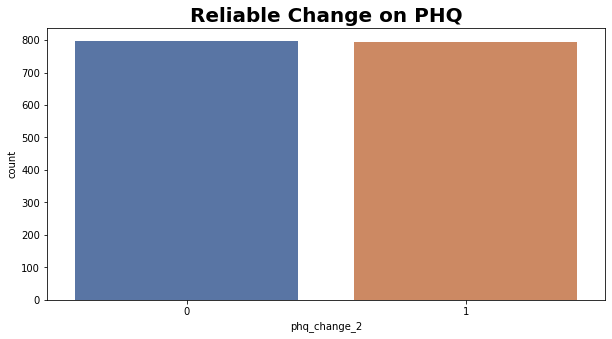

In [138]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('phq_change_2',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [139]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    797
1    794
Name: phq_post, dtype: int64

In [140]:
df2["percent_phq"] = (df2["phq_post"]/df2["phq_d_sum"])*100

In [141]:
df2["percent_phq"] = np.where((df2['percent_phq'] <= 50),0,1) 

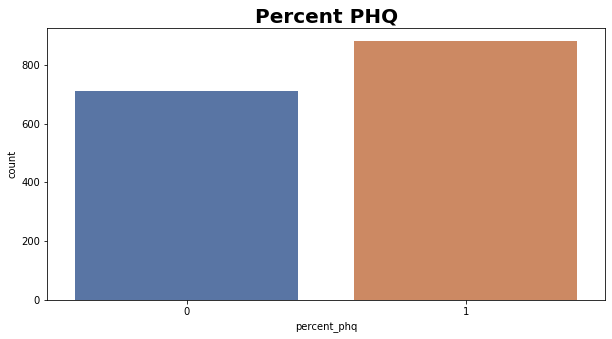

In [142]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('percent_phq',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Percent PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [143]:
df2["phq_change_2"] = np.where((((df2['percent_phq'] ==0) & (df2["phq_post"] <= 9)) | ((df2["phq_d_sum"] >= 5) \
                        & (df2["phq_post"] <= 4))),0,1)

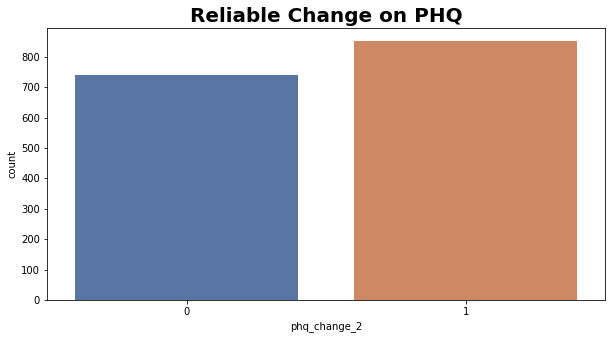

In [144]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('phq_change_2',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [145]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    739
1    852
Name: phq_post, dtype: int64

In [146]:
df2["phq_change_2"] = np.where(((df2['percent_phq'] ==0) & (df2["phq_post"] <= 9)),0,1)

In [147]:
df2.groupby("phq_change_2")["phq_post"].count()

phq_change_2
0    708
1    883
Name: phq_post, dtype: int64

In [148]:
df2["phq_relclin_change"] = np.where(((df2["phq_change"] >=5) & (df2["phq_post"] <= 9)),0,1)

In [149]:
df2.groupby("phq_relclin_change")["phq_post"].count()

phq_relclin_change
0    797
1    794
Name: phq_post, dtype: int64

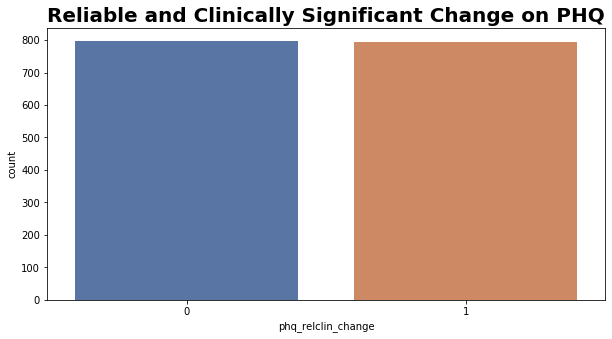

In [150]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot("phq_relclin_change",data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable and Clinically Significant Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [151]:
df2.drop(["phq_post"], axis=1, inplace=True)

In [152]:
b

NameError: name 'b' is not defined

In [ ]:
from tableone import TableOne

In [ ]:
columns = ['age', 'PRE_sex', 'n_diagn', 'bmi_score', 'phq_change', 'PRE_bdi_sum',
'PRE_education', 
 'phq_d_sum',
 'phq_early_change',
 'phq_s_sum',
 'eurohis_sum',
 'imet_sum',
 'gad_sum',
 'costa_sum',
 'pathev_sum',
 'euheals_sum',
 'ipqr_sum',
 'gpse_sum',
'bsss_perceived',
 'bsss_suppseek']

In [ ]:
columns = ['age', 'PRE_sex','phq_change', 'n_diagn', 'PRE_education']

In [ ]:
categorical = ['PRE_education']

In [ ]:
groupby = 'phq_change'

In [ ]:
mytable = TableOne(df2, columns=columns,
                   groupby=groupby)

In [ ]:
print(mytable.tabulate(tablefmt="github"))

### 1.2.9 Prepare missing values for RF Skript

In [ ]:
#miss_df2 = missing_values_table(df2)

In [ ]:
#df2.columns.tolist()

In [ ]:
#missing_cols = list(miss_df2.index)

### 1.3 Export pepared data for RF Skript

In [ ]:
filename = path + "prepared_data_final.csv"
df2.to_csv(filename, sep=";", encoding="utf-8")

In [ ]:
df2.to_csv(filename, sep=";", encoding="utf-8")

In [ ]:
y = df2["phq_change"]

In [ ]:
X = df2.drop("phq_change", axis=1)

In [ ]:
X_test = X[:]

## 2.0 Build Random Forest Model

Best practise for Training Random Forests:
* Factor out linear relationships between predictor and response (strong linear relationships often overpowers subtler effects) --> change target variable (ggf. anderes Outcome). Andere Idee: erstmal linear Regression, dann Random Forest on Residuals 
    * wichtig: R^2 can be misleading, when comparing models with linear components vs. nonlinear 
* Feature Engineering is key: 
    * use domain knowledge as a guide
    * explicitly define interaction effects as new predictors (wenn man bereits davon ausgeht, dass es welche gibt)
    * use multiple metrics that are proxies for the same concept as predictors (leads to better performance, can help make the model less vulnerable to outliers)
* Best Practices for Interpreting Random Forests: 
    * Check that feature importances align with expectations/intuition
    * confirm which features are actually adding predictive value
    * if features expected to be important are not --> data or model issues
* Check directional relationship between top predictors and response 
    * Manually step through 4-5 levels of a few trees to detect patterns 
    * "Stress Test" the model with syn thetic data, that varies the value of one predictor while holding the others equal 
* Visualize Random Forests with scikit-learn

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = df2["phq_change"], test_size = 0.33, random_state= 1)

### Scale BMI Score

In [ ]:
from sklearn.preprocessing import StandardScaler
bmi_scaler = StandardScaler()

In [ ]:
X_train["bmi_score"] = bmi_scaler.fit_transform(X_train[["bmi_score"]])

In [ ]:
X_test["bmi_score"] = bmi_scaler.transform(X_test[["bmi_score"]])

### Scale Age

In [ ]:
age_scaler = StandardScaler()

In [ ]:
X_train["age"] = age_scaler.fit_transform(X_train[["age"]])

In [ ]:
X_test["age"] = age_scaler.transform(X_test[["age"]])

### Scale PRE Internet

In [ ]:
internet_scaler = StandardScaler()

In [ ]:
X_train["PRE_internet"] = internet_scaler.fit_transform(X_train[["PRE_internet"]])

In [ ]:
X_test["PRE_internet"] = internet_scaler.transform(X_test[["PRE_internet"]])

### 2.1 Training Set

In [ ]:
y_train = np.array(y_train)

In [ ]:
feature_names = list(X.columns)

In [ ]:
X_train = np.array(X_train)

In [ ]:
X_train.shape

In [ ]:
X_train.shape[1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
clf_y_pred= clf.predict(X_test)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state = 42, oob_score=True, class_weight='balanced', max_depth = 6)
#rfe = RFE(estimator=rf, n_features_to_select=100)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
y_test[:]

In [ ]:
y_prediction = np.zeros((len(y_test), 3))
y_prediction[:,0] = rf.predict(X_test)
y_prediction[:,1] = y_test[:]

counter_class1_correct = 0
counter_class2_correct = 0
counter_class1_incorrect = 0
counter_class2_incorrect = 0

for i in range(len(y_test)):
    if y_prediction[i,0] == y_prediction[i,1]:
        y_prediction[i,2] = 1
        if y_prediction[i,1] == 1:
            counter_class1_correct += 1
        else:
            counter_class2_correct += 1
    else:
        y_prediction[i,2] = 0
        if y_prediction[i,1] == 1:
            counter_class1_incorrect += 1
        else:
            counter_class2_incorrect += 1

In [ ]:
clf_y_prediction = np.zeros((len(y_test), 3))
clf_y_prediction[:,0] = clf.predict(X_test)
clf_y_prediction[:,1] = y_test[:]

clf_counter_class1_correct = 0
clf_counter_class2_correct = 0
clf_counter_class1_incorrect = 0
clf_counter_class2_incorrect = 0

for i in range(len(y_test)):
    if clf_y_prediction[i,0] == clf_y_prediction[i,1]:
        clf_y_prediction[i,2] = 1
        if clf_y_prediction[i,1] == 1:
            clf_counter_class1_correct += 1
        else:
            clf_counter_class2_correct += 1
    else:
        clf_y_prediction[i,2] = 0
        if clf_y_prediction[i,1] == 1:
            clf_counter_class1_incorrect += 1
        else:
            clf_counter_class2_incorrect += 1

In [ ]:
accuracy = y_prediction.mean(axis=0)[2]
accuracy_class1 = counter_class1_correct / (counter_class1_correct + counter_class1_incorrect)
accuracy_class2 = counter_class2_correct / (counter_class2_correct + counter_class2_incorrect)
balanced_accuracy = (accuracy_class1 + accuracy_class2) / 2
oob_accuracy = rf.oob_score_
log_loss_value = log_loss(y_test, rf.predict_proba(X_test), normalize=True)

In [ ]:
clf_accuracy = clf_y_prediction.mean(axis=0)[2]
clf_accuracy_class1 = clf_counter_class1_correct / (clf_counter_class1_correct + clf_counter_class1_incorrect)
clf_accuracy_class2 = clf_counter_class2_correct / (clf_counter_class2_correct + clf_counter_class2_incorrect)
clf_balanced_accuracy = (clf_accuracy_class1 + clf_accuracy_class2) / 2

In [ ]:
fpr, tpr, __ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
print('\nAccuracy: ', str(accuracy), '\nAccuracy_class0: ', str(accuracy_class1), '\nAccuracy_class1: ', 
        str(accuracy_class2), '\nBalanced Accuracy: ', str(balanced_accuracy), '\nOOB Accuracy ', str(oob_accuracy), '\nLog Loss value: ', str(log_loss_value))

In [ ]:
print('\nAccuracy: ', str(clf_accuracy), '\nAccuracy_class0: ', str(clf_accuracy_class1), '\nAccuracy_class1: ', 
      str(clf_accuracy_class2), '\nBalanced Accuracy: ', str(clf_balanced_accuracy))

#

In [ ]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: {}".format(accuracy))

print("\nOOB Score: {}".format(rf.oob_score_))

# Nun sagen wir unseren Testdatensatz mithilfe des Test Datensatzes vorher. 
# Dieser wurde von unserem Modell noch nie gesehen. 
    
rf_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy: {}".format(rf_accuracy))

rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("\nBalanced Accuracy: {}".format(rf_balanced_accuracy))

rf_precision = precision_score(y_test, y_pred)
print("\nPrecision: {}".format(rf_precision))

rf_recall = recall_score(y_test, y_pred)
print("\nRecall: {}".format(rf_recall))


In [ ]:
rep = classification_report(y_test, y_pred)

In [ ]:
print(rep)

In [ ]:
# Plot Confusion Matrix 
fig, ax = plt.subplots(figsize=(10, 10))

confusion_matrix(y_pred, y_test)
metrics.plot_confusion_matrix(rf, X_test, y_test, normalize=None, ax=ax)

In [ ]:
# Erstelle einen Dataframe mit True und Predicted Values und der errechneten Wahrscheinlichkeit  

probabilities = rf.predict_proba(X_test)

rf_df = pd.DataFrame(zip(y_test, y_pred, probabilities), 
                   columns = ["Actual Value", "Predicted Value", "Probability (left: No, right: Yes)"])

rf_df["Result"] = np.where(rf_df["Actual Value"] == rf_df["Predicted Value"], "Right", "Wrong")


rf_df.set_index("Actual Value").head(20)

### Check feature importance 

In [ ]:
importances = rf.feature_importances_

In [ ]:
importances.shape

In [ ]:
#importances = importances.reshape((1,272))

In [ ]:
#importances.shape[1]

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
indices.shape

In [ ]:
names = [feature_names[i] for i in indices]

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1])[:20], importances[indices][:20])
plt.xticks(range(20), names, rotation=90)
plt.show()

In [ ]:
a = [0.661764705882353, 0.5983606557377049, 0.6507936507936509, 0.5897435897435898, 0.611111111111111]
b = [0.6395114503816794, 0.6169416671778201, 0.6573614937251301, 0.6223391240518718, 0.6213580322640004]
c = zip(a,b)


In [ ]:
def calculate_diff(zipped_lists, X_train, X_test):
    
    diff = [y - x for y, x in zipped_lists]
    #Compute the mean of differences
    d_bar = np.mean(diff)
    #compute the variance of differences
    sigma2 = np.var(diff)
    #compute the number of data points used for training 
    n1 = len(X_train)
    #compute the number of data points used for testing 
    n2 = len(X_test)
    #compute the total number of data points
    n = n1+n2
    #compute the modified variance
    sigma2_mod = sigma2 * (1/n + n2/n1)
    #compute the t_static
    t_static =  d_bar / np.sqrt(sigma2_mod)
    #Compute p-value and plot the results 
    p = 200*(1 - t.cdf(t_static, n-1))

    return p

In [ ]:
diff = [y - x for y, x in c]

In [ ]:
import numpy as np
from scipy.stats import t
d_bar = np.mean(diff)
sigma2 = np.var(diff)


In [ ]:
n1 = 1000
n2 = 300
n = n1+n2

In [ ]:
sigma2_mod = sigma2 * (1/n + n2/n1)

In [ ]:
sigma2_mod

In [ ]:
t_static = d_bar / np.sqrt(sigma2_mod)

In [ ]:
p = ((1.0 - t.cdf(t_static, n-1))*2)

In [ ]:
p

In [ ]:
from scipy.stats import t
from math import sqrt
from statistics import stdev

def corrected_dependent_ttest(data1, data2, n_training_folds, n_test_folds, alpha):
    n = len(data1)
    differences = [(data1[i]-data2[i]) for i in range(n)]
    sd = stdev(differences)
    divisor = 1 / n * sum(differences)
    test_training_ratio = n_test_folds / n_training_folds  
    denominator = sqrt(1 / n + test_training_ratio) * sd
    t_stat = divisor / denominator
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p


In [ ]:
corrected_dependent_ttest(a,b,100,50,0.05)

In [ ]:
len(c)